# Assignment3

1. sklearn 패키지를 사용해 로지스틱 회귀모형으로 데이터를 분석해 주세요 
2. 성능지표를 계산하고 이에 대해 해석해 주세요 
   - sklearn : mean accuracy, f1 score 등 다양한 성능지표 계산 
   - confusion matrix : tp, fp, fn, tn 값을 통해 성능지표 계산  
3. 로지스틱 회귀분석은 cutoff 설정 값에 따라 classification의 성능이 달라집니다.      
   해당 데이터셋에 걸맞는 cutoff value를 찾아보고, 이를 기반으로 예측을 진행해 성능을 평가해 주세요.
4. **해석을 상세하게 달아주세요 !**

## Data 

출처 : https://www.kaggle.com/mlg-ulb/creditcardfraud


* V1 ~ V28 : 비식별화 된 개인정보 
* **Class** : Target 변수  
  - 1 : fraudulent transactions (사기)
  - 0 : otherwise 

In [1]:
import pandas as pd
import numpy as np

In [2]:
credit = pd.read_csv("assignment3_creditcard.csv")

In [3]:
credit.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.848212,2.384900,0.379573,1.048381,-0.845070,2.537837,-4.542983,-10.201458,-1.504967,-2.234167,...,2.585817,-5.291690,0.859364,0.423231,-0.506985,1.020052,-0.627751,-0.017753,0.280982,0
1,2.071805,-0.477943,-1.444444,-0.548657,0.010036,-0.582242,-0.042878,-0.247160,1.171923,-0.342382,...,-0.077306,0.042858,0.390125,0.041569,0.598427,0.098803,0.979686,-0.093244,-0.065615,0
2,-2.985294,-2.747472,1.194068,-0.003036,-1.151041,-0.263559,0.553500,0.635600,0.438545,-1.806488,...,1.345776,0.373760,-0.385777,1.197596,0.407229,0.008013,0.762362,-0.299024,-0.303929,0
3,-1.479452,1.542874,0.290895,0.838142,-0.529290,-0.717661,0.484516,0.545092,-0.780767,0.324804,...,0.038397,0.116771,0.405560,-0.116453,0.541275,-0.216665,-0.415578,0.027126,-0.150347,0
4,-0.281976,-0.309699,-2.162299,-0.851514,0.106167,-1.483888,1.930994,-0.843049,-1.249272,1.079608,...,-0.875516,-0.004199,1.015108,-0.026748,0.077115,-1.468822,0.751700,0.496732,0.331001,0


## 1. Logistic Regression 

In [4]:
credit.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
count,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,...,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000,28678.000000
mean,-0.015438,0.053653,-0.046031,0.037348,-0.033724,-0.003299,-0.051054,0.006064,-0.018530,-0.041149,...,0.002633,0.010289,-0.000656,-0.004800,-0.000897,-0.001989,-0.000765,0.000948,0.001535,0.008578
std,2.031529,1.616186,1.758169,1.482109,1.486998,1.339259,1.454827,1.364342,1.134065,1.252593,...,0.720307,0.847152,0.739469,0.593663,0.603349,0.517968,0.483852,0.397075,0.296736,0.092221
min,-30.552380,-42.172688,-31.103685,-5.560118,-42.147898,-21.929312,-41.506796,-39.267378,-13.434066,-24.403185,...,-21.387122,-21.453736,-8.887017,-36.666000,-2.718024,-6.712624,-2.241620,-7.418878,-9.617915,0.000000
25%,-0.916927,-0.575381,-0.899872,-0.843321,-0.714901,-0.763757,-0.568146,-0.206103,-0.661909,-0.543450,...,-0.209678,-0.225520,-0.539244,-0.160583,-0.356047,-0.318619,-0.327343,-0.070558,-0.052189,0.000000
50%,0.020050,0.075358,0.180610,-0.008844,-0.060040,-0.271363,0.036107,0.022463,-0.055095,-0.097390,...,-0.062792,-0.028778,0.007302,-0.011199,0.040006,0.019770,-0.056260,0.002049,0.011075,0.000000
75%,1.317461,0.806957,1.029928,0.771958,0.613328,0.397269,0.559409,0.329606,0.605704,0.460681,...,0.131199,0.184312,0.526358,0.146835,0.437146,0.352717,0.240713,0.091637,0.078911,0.000000
max,2.399484,21.467203,4.069865,11.927512,32.911462,22.529298,36.677268,20.007208,8.113152,15.236028,...,26.237391,27.202839,8.361985,9.637187,3.948061,2.510401,3.122747,11.135740,14.929133,1.000000


In [5]:
# target 변수 설정 
#target = credit['Class']

In [6]:
#target.value_counts()

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [8]:
X = credit.drop(["Class"], axis=1)
y = credit["Class"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [10]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(21508, 28) (7170, 28) (21508,) (7170,)


In [11]:
# Logistic Regression 
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [12]:
# class 예측
y_pred = classifier.predict(X_test) 
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [13]:
# [0으로 분류될 확률, 1로 분류될 확률]
classifier.predict_proba(X_test)

array([[9.99150341e-01, 8.49658679e-04],
       [9.99678842e-01, 3.21158487e-04],
       [9.80151409e-01, 1.98485909e-02],
       ...,
       [9.99926536e-01, 7.34644299e-05],
       [9.96021189e-01, 3.97881060e-03],
       [9.99271417e-01, 7.28582810e-04]])

In [14]:
# mean accuracy 
classifier.score(X_test, y_test)

0.997907949790795

#### 입력값과 출력값 비교

In [15]:
prob = [prob[1] for prob in classifier.predict_proba(X_test)] # class 1에 속할 확률 

In [16]:
ce_df = {
    'y_test' : y_test, # 실제
    'y_pred' : y_pred, # 예측
    'prob' : prob      # 1로 분류할 확률 
}

ce_df = pd.DataFrame(ce_df)

In [17]:
ce_df 

,y_test,y_pred,prob
2124,0,0,0.000850
5521,0,0,0.000321
21800,0,0,0.019849
16959,0,0,0.000151
27369,0,0,0.000131
...,...,...,...
8867,0,0,0.000891
12996,0,0,0.000901
2886,0,0,0.000073
829,0,0,0.003979


In [18]:
yi = ce_df["y_test"].to_numpy()
pi = ce_df["prob"].to_numpy()

In [19]:
# cross entropy 
-np.sum((yi * np.log(pi) + (1-yi) * np.log(1-pi))) / ce_df.shape[0]

0.007366324274364184

## 2. Metrics Evaluation 

### 1) sklearn 패키지를 이용한 성능 평가지표 계산 

In [20]:
from sklearn.metrics import *

In [21]:
# f1 score
f1_score(y_test,y_pred) 

0.845360824742268

In [22]:
confusion_matrix( y_test,y_pred)

array([[7114,    4],
       [  11,   41]], dtype=int64)

### 2) confusion matrix를 이용한 성능 평가지표 계산 

In [23]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred,labels=[0,1]).ravel()
(tn, fp, fn, tp)

(7114, 4, 11, 41)

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print("accuracy: ", accuracy)

accuracy:  0.997907949790795


In [25]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test,y_pred)
specificity = tn/(tn+fp)
f1_score = f1_score(y_test,y_pred)

In [26]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.9111111111111111
recall:  0.7884615384615384
specificity:  0.9994380443944928
f1_score:  0.845360824742268


### 3) cut-off value 찾아보기 
* fpr = fall-out = 1-specificity
* tpr = sensitivity

In [27]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,classifier.predict_proba(X_test)[:, 1])

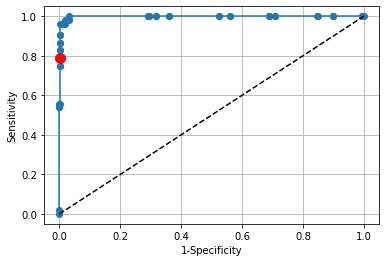

In [28]:
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-specificity], [recall], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.grid(True)
plt.show()

In [29]:
# roc curve 아래의 면적 
auc = roc_auc_score(y_test, y_pred)
auc

0.8939497914280155

## 3. 새로운 cutoff value로 모델 예측하기 

In [30]:
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

* y축은 최대, x축은 최소가 되는 접선의 기울기가 1인 지점을 찾기위한 optimal_idx,optimal_threshold값을 찾아준다

In [31]:
predict_new = [1 if x >= optimal_threshold else 0 for x in classifier.predict_proba(X_test)[:, 1]]

* 찾은 optimal_threshold 보다 크면 1로 작으면 0으로 되게하여 새로운 에측값을 찾아준다

In [32]:
# 새로운 cutoff value로 분류한 confusion matrix 
confusion_matrix(y_test, predict_new)

array([[6898,  220],
       [   0,   52]], dtype=int64)

In [33]:
tn, fp, fn, tp = confusion_matrix(y_test,predict_new,labels=[0,1]).ravel()
(tn, fp, fn, tp)

(6898, 220, 0, 52)

In [34]:
accuracy = accuracy_score(y_test, predict_new)
print("accuracy: ", accuracy)

accuracy:  0.9693165969316597


In [36]:
precision = precision_score(y_test, predict_new)
recall = recall_score(y_test,predict_new)
specificity = tn/(tn+fp)
f1_score = f1_score(y_test, y_pred)

In [37]:
print("precision: ", precision)
print("recall: ", recall)
print("specificity: ", specificity)
print("f1_score: ", f1_score)

precision:  0.19117647058823528
recall:  1.0
specificity:  0.969092441697106
f1_score:  0.845360824742268


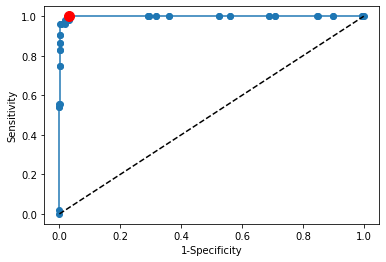

In [38]:
plt.plot(fpr, tpr, 'o-', label="Logistic Regression") 
plt.plot([0, 1], [0, 1], 'k--')
plt.plot([1-(tn / (fp+tn))], [tp / (fn+tp)], 'ro', ms=10) # 현재 cutoff value 값 
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

#### Q. cutoff value를 바꿔서 나온 결과의 의의는 무엇일까요 ? 

데이터가 매우 불균형하고 사기인 비율이 매우적기 때문에 1-spec값은 낮추고 sens값은 높일 수 있는 최적의 cutoff값은 매우 작은 값으로 나온다!

### 피드백 받은 내용
<cutoff value를 바꿔서 나온 결과의 의의>
이전 모델보다 평가지표는 매우 낮아졌지만 TP 값이 증가하고, FN값이 감소한 것에서 의의를 찾을 수 있습니다.

- 사기 탐지 모델의 경우, 사기가 발생했을 때 제대로 캐치하는 것이 중요합니다. (= TP)
- FDS(이상거래탐지시스템)은 카드 부정사용 및 이상징후를 실시간 탐지하여, 이상거래를 신속하게 대응하는 것을 주 목적으로 합니다. 따라서 실제 사기 행위를 제대로 적발하지 못하는 것이 가장 위험한 행동이 될 수 있습니다. (=FN)
- FDS에서 정상, 비정상 정보의 불균형(비정상 행위 정보(Y=1)의 양이 매우 부족) 문제는 사기를 적발하는 데에 어려움을 주고 있습니다. (Y=0에 치우쳐져서 학습) -> 우리는 이러한 점을 고려해 cutoff를 조정함으로써 재분류 해 보는 과정을 수행한 것입니다 !
- FP의 값은 늘어났지만, 이는 철저하게 사기를 예방하는 차원에서 한 번 더 점검한다는 생각으로 본다면 좋을 것 같습니다.